# Lasso回归引入的是L1范数惩罚项 ， alpha是正则化系数

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class LassoRegression:
    
    def __init__(self , degree , alpha):
        self.poly_reg = Pipeline([
            ("poly", PolynomialFeatures(degree=degree)),
            ("std_scaler", StandardScaler()),
            ("lasso_reg", Lasso(alpha = alpha))
        ])
        self.flog = False
    
    def fit(self , X_train , y_train):
        """根据训练数据集X_train, y_train训练PolynomialRegression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        self.poly_reg.fit(X_train , y_train)
        self.flog = True
    
    def predict(self , X_test):
        assert self.flog == True , "must fit before predict!"
        return self.poly_reg.predict(X_test)
    
    def score(self ,X_test , y_test):
        assert X_test.shape[0] == y_test.shape[0], \
            "the size of X_test must be equal to the size of y_test"
        y_predict = self.predict(X_test)
        return 1 -  (np.sum((y_test - y_predict)**2) / len(y_test)) / np.var(y_test)
    

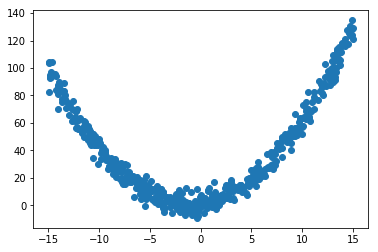

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.random.uniform(-15, 15, size=500)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 5, 500)
%matplotlib inline
plt.scatter(x , y)

In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

## 测试

0.9830194701956728


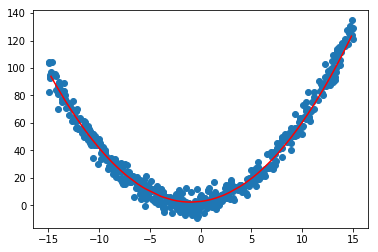

In [5]:
# 正则化系数alpha = 1
pl = LassoRegression(2 , 1)
pl.fit(X_train , y_train)
y_predict = pl.predict(X_test)
print(pl.score(X_test , y_test))
plt.scatter(x, y)
plt.plot(np.sort(X_test.reshape(100)), y_predict[np.argsort(X_test.reshape(100))], color='r')